#  第二讲 复杂网络的统计特征【实践】二

In [ ]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==2.6.3, matplotlib==3.5.2, pandas==1.4.3

## 度-度相关性

### 1. 基于最近邻平均度值的度-度相关性

In [2]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# 加载三个真实数据集
# 1. 科学合作网络
df1 = pd.read_csv("citation.csv")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())
# 2. 电网
df2 = pd.read_csv("power.csv")
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using = nx.Graph())
# 3. 代谢网络
df3 = pd.read_csv("celegans_metabolic.csv")
G3 = nx.from_pandas_edgelist(df3, 'source', 'target', create_using = nx.Graph())

In [4]:
# 定义求最近邻平均度的函数
def average_nearest_neighbor_degree(G):
    k = set([G.degree(i) for i in G.nodes()])  # 获取所有可能的度值
    sorted_k = sorted(k)
    
    k_nn_k = []
    for ki in sorted_k:
        if ki == 0:
            k_nn_k.append(0.0)   
        else:
            c = 0
            k_nn_i = 0
            for i in G.nodes():
                if G.degree(i) == ki:  
                    k_nn_i += sum([G.degree(j) for j in list(nx.all_neighbors(G,i))])/ki
                    c += 1
            k_nn_k.append(k_nn_i/c)     
    
    return sorted_k, k_nn_k

### 2. 基于Pearson相关系数的度-度相关性

In [5]:
r1 = nx.degree_assortativity_coefficient(G1)
r2 = nx.degree_assortativity_coefficient(G2)
r3 = nx.degree_assortativity_coefficient(G3)
print(r1)
print(r2)
print(r3)

0.13506886900042142
0.0034569877442048825
-0.219662309363656


In [6]:
r1 = nx.degree_pearson_correlation_coefficient(G1)
r2 = nx.degree_pearson_correlation_coefficient(G2)
r3 = nx.degree_pearson_correlation_coefficient(G3)
print(r1)
print(r2)
print(r3)

0.13506886900042697
0.0034569877442049077
-0.21966230936365552


In [7]:
x1, y1 = average_nearest_neighbor_degree(G1)
x2, y2 = average_nearest_neighbor_degree(G2)
x3, y3 = average_nearest_neighbor_degree(G3)

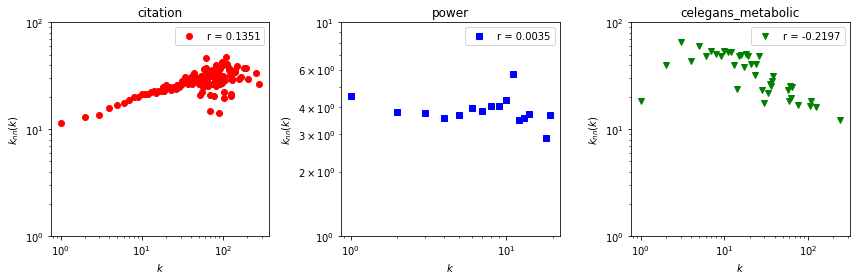

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(x1, y1, 'ro', label='r = '+'%.4f'%r1)
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$k_{nn}(k)$")
plt.xscale("log")
plt.yscale("log")
plt.title('citation')
plt.ylim([1,100])

plt.subplot(132)
plt.plot(x2, y2, 'bs', label='r = '+'%.4f'%r2)
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$k_{nn}(k)$")
plt.xscale("log")
plt.yscale("log")
plt.title('power')
plt.ylim([1,10])

plt.subplot(133)
plt.plot(x3, y3, 'gv', label='r = '+'%.4f'%r3)
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$k_{nn}(k)$")
plt.xscale("log")
plt.yscale("log")
plt.title('celegans_metabolic')
plt.ylim([1,100])

plt.tight_layout()

## 介数和核度

### 节点介数

In [9]:
BA = nx.barabasi_albert_graph(20, 2)
bc = nx.betweenness_centrality(BA)
print(bc)

{0: 0.41429963798384845, 1: 0.008145363408521305, 2: 0.2119186856028961, 3: 0.11584516847674742, 4: 0.16436925647451964, 5: 0.06613756613756613, 6: 0.10916179337231971, 7: 0.012043998886104147, 8: 0.09001670843776105, 9: 0.02081592871066555, 10: 0.022904483430799216, 11: 0.0, 12: 0.0, 13: 0.003898635477582846, 14: 0.05785296574770259, 15: 0.02227791701475912, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.007797270955165692}


0


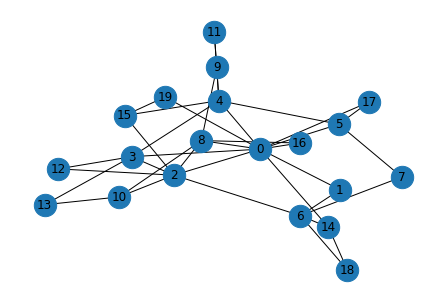

In [10]:
# 获取介数最大的节点标签
max_id = max(bc, key=bc.get)
print(max_id)
# 绘制网络
nx.draw(BA, node_size=500, with_labels=True)

### 边介数

In [11]:
ebc = nx.edge_betweenness_centrality(BA)
print(ebc)

{(0, 1): 0.08145363408521303, (0, 2): 0.07180451127819548, (0, 3): 0.08991228070175437, (0, 4): 0.09304511278195489, (0, 5): 0.07500000000000001, (0, 8): 0.06929824561403508, (0, 14): 0.1261904761904762, (0, 16): 0.07192982456140351, (0, 17): 0.07982456140350877, (0, 19): 0.08728070175438596, (1, 6): 0.03320802005012532, (2, 3): 0.038471177944862156, (2, 6): 0.12800751879699246, (2, 8): 0.052944862155388454, (2, 10): 0.06535087719298245, (2, 12): 0.06052631578947369, (2, 15): 0.0643483709273183, (3, 4): 0.06303258145363408, (3, 12): 0.03947368421052632, (3, 13): 0.07763157894736843, (4, 5): 0.059523809523809514, (4, 9): 0.05175438596491228, (4, 11): 0.07951127819548873, (4, 15): 0.04899749373433583, (5, 7): 0.0643483709273183, (5, 17): 0.020175438596491225, (6, 7): 0.05733082706766917, (6, 14): 0.02794486215538847, (6, 18): 0.049999999999999996, (8, 9): 0.06522556390977444, (8, 10): 0.04649122807017544, (8, 16): 0.02807017543859649, (9, 11): 0.02048872180451128, (10, 13): 0.02938596491

### 核度

In [12]:
ks = nx.core_number(BA)
print(ks)

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2}


{0: 4, 1: 4, 2: 4, 3: 4, 4: 3, 5: 3, 6: 3, 7: 4, 8: 4, 9: 2, 10: 3, 11: 1, 12: 2, 13: 4, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 3, 30: 4, 31: 3, 32: 4, 33: 4}
0


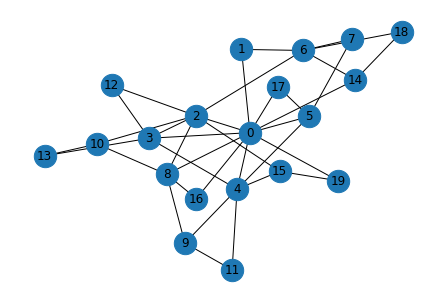

In [13]:
# 换一个网络试试
kcg = nx.karate_club_graph()
ks = nx.core_number(kcg)
print(ks)
# 获取核度最大的节点标签
max_id = max(ks, key=ks.get)
print(max_id)
nx.draw(BA, node_size=500, with_labels=True)

### 网络密度

In [14]:
print(nx.density(kcg))

0.13903743315508021


## 几种常用的中心性指标

In [15]:
# 分别生成ER和BA无标度网络，节点数设定为N=100
GER = nx.erdos_renyi_graph(100,0.08)
GBA = nx.barabasi_albert_graph(100,4)

In [16]:
# 度中心性
dc1 = nx.degree_centrality(GER) 
dc2 = nx.degree_centrality(GBA) 
# 介数中心性
bc1 = nx.betweenness_centrality(GER)
bc2 = nx.betweenness_centrality(GBA)
# 接近度中心性
cc1 = nx.closeness_centrality(GER)
cc2 = nx.closeness_centrality(GBA)
# 特征向量中心性
ec1 = nx.eigenvector_centrality(GER)
ec2 = nx.eigenvector_centrality(GBA)

Text(0.5, 1.0, 'eigenvector_centrality')

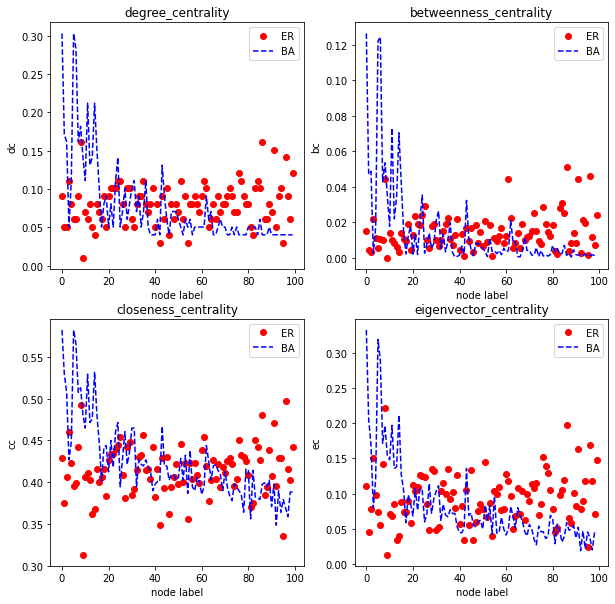

In [17]:
# 绘图比较
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(dc1.keys(), dc1.values(), 'ro', label='ER')
plt.plot(dc2.keys(), dc2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("dc")
plt.title("degree_centrality")

plt.subplot(222)
plt.plot(bc1.keys(), bc1.values(), 'ro', label='ER')
plt.plot(bc2.keys(), bc2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("bc")
plt.title("betweenness_centrality")

plt.subplot(223)
plt.plot(cc1.keys(), cc1.values(), 'ro', label='ER')
plt.plot(cc2.keys(), cc2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("cc")
plt.title("closeness_centrality")

plt.subplot(224)
plt.plot(ec1.keys(), ec1.values(), 'ro', label='ER')
plt.plot(ec2.keys(), ec2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("ec")
plt.title("eigenvector_centrality")

## 有向网络与加权网络的静态特征

### 有向网络

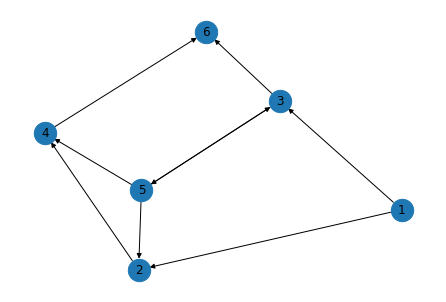

In [18]:
# 创建一个空的有向网络
DG = nx.DiGraph()
DG.add_nodes_from([1,2,3,4,5,6])
DG.add_edges_from([(1,2),(1,3),(2,4),(3,5),(4,6),(5,2),(5,4),(5,3),(3,6)])
nx.draw(DG,node_size=500,with_labels=True)

In [19]:
# 获取各个节点的入度、出度和总度
print(DG.in_degree)
print(DG.out_degree)
print(DG.degree)

[(1, 0), (2, 2), (3, 2), (4, 2), (5, 1), (6, 2)]
[(1, 2), (2, 1), (3, 2), (4, 1), (5, 3), (6, 0)]
[(1, 2), (2, 3), (3, 4), (4, 3), (5, 4), (6, 2)]


### 加权网络

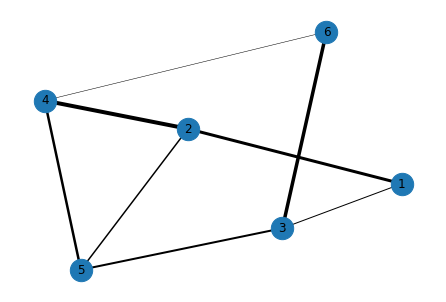

In [20]:
# 创建一个无向加权网络
WG = nx.Graph()
WG.add_nodes_from([1,2,3,4,5,6])
WG.add_weighted_edges_from([(1,2,3),(1,3,1),(2,4,4),(2,5,1.5),(3,5,2),(3,6,3.5),(4,5,2.5),(4,6,0.5)])
w = [WG[e[0]][e[1]]['weight'] for e in WG.edges()]
nx.draw(WG,node_size=500,width=w,with_labels=True)

In [21]:
# 获取网络节点的加权度（即点权）
nx.degree(WG, weight='weight')

DegreeView({1: 4, 2: 8.5, 3: 6.5, 4: 7.0, 5: 6.0, 6: 4.0})

In [22]:
# 获取每条边的权重
for e in WG.edges():
    print(WG[e[0]][e[1]]['weight'])

3
1
4
1.5
2
3.5
2.5
0.5
